In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.RecUnet.RecUnet import *
from NN_library.RecUnet.train_RecUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
loaders = get_loaders(data, 16)

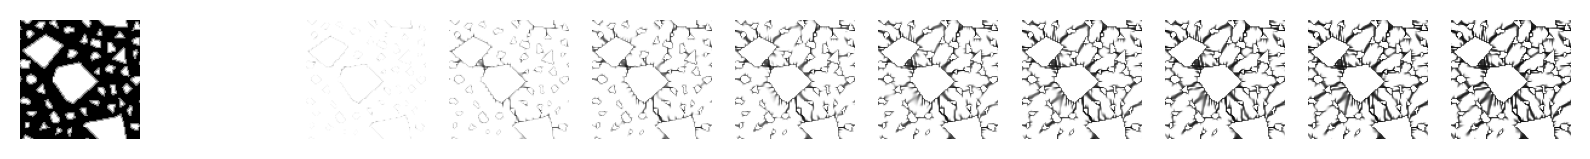

In [3]:
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(15)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys', vmin=0, vmax=1)
    axs.flat[i].set_axis_off()

In [4]:
name = 'NN_library/RecUnet/RecUnet'
args = {'lr' : 0.0001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [ ]:
unet = RecUnet()

In [9]:
torch.cuda.empty_cache() 

In [6]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 33367355


In [12]:
unet = load_network(unet, args['name']+'_19', args)

In [13]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  25689.6347656250
Epoch: 0 batch: 100 mean train loss:  25595.1152343750
Epoch: 0 batch: 200 mean train loss:  24783.3437500000
Epoch: 0 batch: 300 mean train loss:  25542.5605468750
Epoch: 0 batch: 400 mean train loss:  25231.3945312500
Epoch: 0 batch: 500 mean train loss:  26857.2031250000
Epoch: 0 batch: 600 mean train loss:  26357.8750000000
Epoch: 0 batch: 700 mean train loss:  25205.2812500000
Epoch: 0 batch: 800 mean train loss:  24835.1816406250
Epoch: 0 batch: 900 mean train loss:  24796.3437500000
Epoch: 0 batch: 1000 mean train loss:  24520.2792968750
Epoch: 0 batch: 1100 mean train loss:  25191.0566406250
Epoch: 0 batch: 1200 mean train loss:  24501.0195312500
Epoch: 0 batch: 1300 mean train loss:  27302.8671875000
Epoch: 0 batch: 1400 mean train loss:  25018.7773437500
Epoch: 0 mean train loss:  25464.2901687120 mean val. rec. loss:  25231.9003906250
Epoch: 1 batch: 0 mean train loss:  25016.6933593750
Epoch: 1 batch: 100 mean train loss:

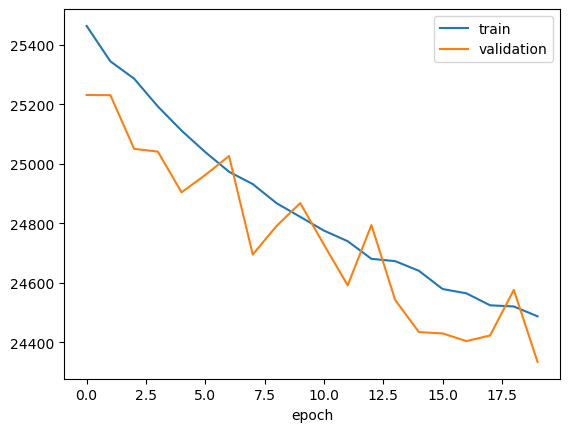

In [14]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])